In [1]:
import os
os.chdir(r'C:\Users\metro\DataMining\Notebook')
os.getcwd()

'C:\\Users\\metro\\DataMining\\Notebook'

### LINEAR REGRESSION--- Seoul Bike Sharing Demand Data Set

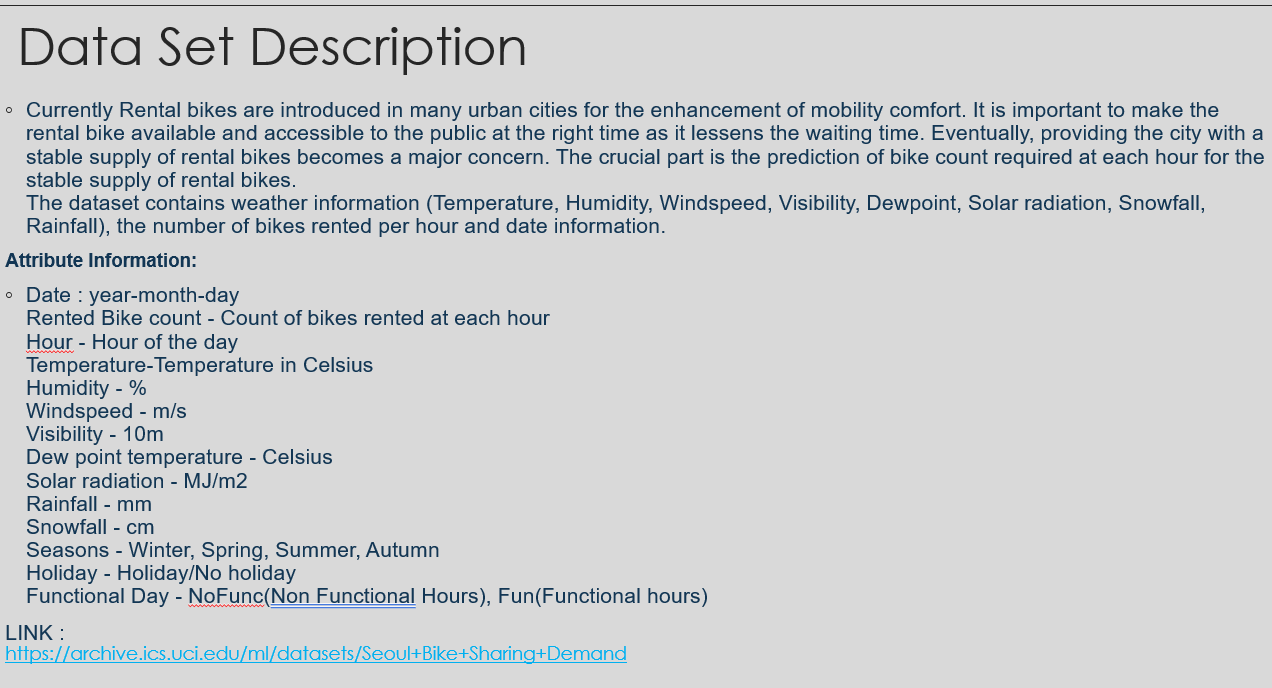

# DATA PREPROCESSING

In [889]:
#DATA PREPROCESSING

import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#For Modelling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


#READING THE DATA
#SeoulBikeData = pd.read_csv('data/SeoulBikeData.csv',na_values='NA') #error 'utf-8' codec can't decode byte 0xb0 in position 12: invalid start byte
SeoulBikeData = pd.read_csv('data/SeoulBikeData.csv',encoding='ISO-8859-1',na_values='NA')

In [890]:
#COPY OF DATASET
SeoulBikeData_Original=SeoulBikeData[:]

# INFORMATION OF THE DATASET

In [926]:
print('The DataFrame contains {} obs and1 14 columns,every hour data collected for a year(2017 Dec to 2018 Nov),so  365*24 = 8760, which represents the number of Observations'.format(SeoulBikeData_Original.shape[0],SeoulBikeData_Original.shape[1]))

The DataFrame contains 8760 obs and1 14 columns,every hour data collected for a year(2017 Dec to 2018 Nov),so  365*24 = 8760, which represents the number of Observations


# DATA TYPES OF ALL THE COLUMNS IN THE CURRENT DATASET

In [892]:
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# VIEWING THE DATASET

In [893]:
SeoulBikeData.head(7)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.0,0.0,0.0,Winter,No Holiday,Yes


In [894]:
#NO DUPLICATES
sum(SeoulBikeData.duplicated())#No duplicates 

0

In [895]:
#NO MISSING VALUES
SeoulBikeData.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

CHECKING FOR OUTLIERS

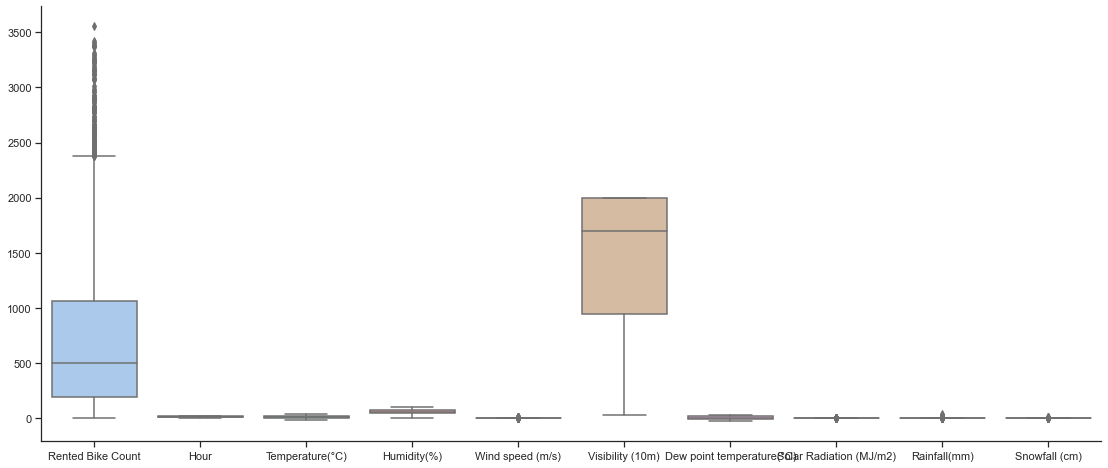

In [896]:
#TO FIND OUTLIERS PLOTTING BOXPLOT
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(19,8))
sns.boxplot(data=SeoulBikeData) #NO OUTLIERS AS SUCH
sns.despine() 

In [897]:
SeoulBikeData.astype('object').describe().transpose()

,count,unique,top,freq
Date,8760,365,23/10/2018,24
Rented Bike Count,8760,2166,0,295
Hour,8760,24,23,365
Temperature(°C),8760,546,20.5,40
Humidity(%),8760,90,53,173
Wind speed (m/s),8760,65,1.1,420
Visibility (10m),8760,1789,2000,2245
Dew point temperature(°C),8760,556,0,60
Solar Radiation (MJ/m2),8760,345,0,4300
Rainfall(mm),8760,61,0,8232


## From Above we can see that there are 4 Seasons,there are 2 unique values for Yes/No Holidays and Yes /No for Functional Day

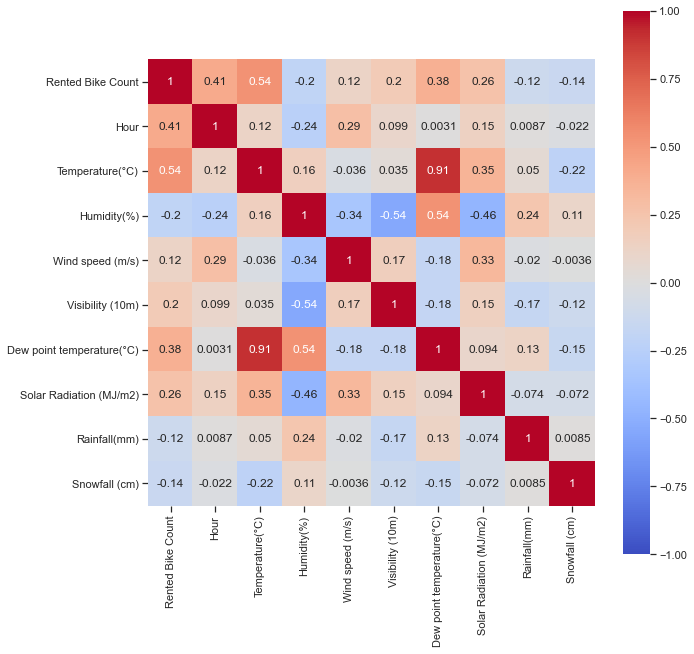

In [898]:
#Finding relation between Variables
plt.figure(figsize=(10,10))
sns.heatmap(SeoulBikeData.corr("pearson"), vmin=-1, vmax=1, cmap='coolwarm', annot=True,  square=True);

## From Above we can make out Variable Dew point temperature(°C) is Highly Linear Correlated to Temperature(°C). Humidity also has good linear relation with Dew Temperature,but I havent dropped it yet 

In [899]:
SeoulBikeData=SeoulBikeData.drop(['Dew point temperature(°C)'],axis=1)

# EDA

In [900]:
SeoulBikeData['Rented Bike Count'].median()

504.5

<AxesSubplot:xlabel='Date'>

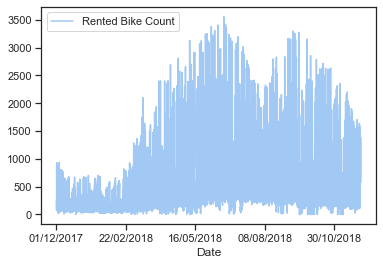

In [901]:
SeoulBikeData.plot(x='Date',y='Rented Bike Count',kind='line')
#we see a high raise between April to July of bikes rent ,seems like spring,summer time more bikes are rented

<AxesSubplot:ylabel='Rented Bike Count'>

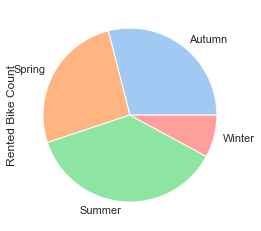

In [902]:
SeoulBikeData.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

<AxesSubplot:xlabel='Hour'>

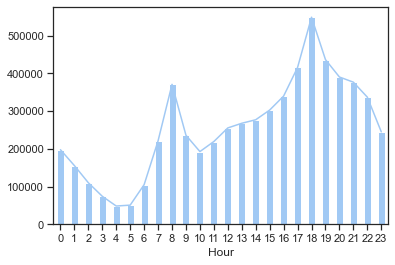

In [903]:
#which hour  has more Rented bike count 
SeoulBikeData.groupby('Hour').sum()['Rented Bike Count'].plot.bar()
SeoulBikeData.groupby('Hour').sum()['Rented Bike Count'].plot()
#W can see Rented Bikes are more in between 7 AM to 9AM and 4PM to 8PM (EVENINGS MORE BIKES ARE RENTED)

###### Convert String Data Type DATE to DateTime and later Extracted the YEAR;MONTH;DAY as Numerical data for applying modelling

In [904]:
#Convert String Data Type DATE to DateTime and later Extracted the YEAR;MONTH;DAY as Numerical data for applying modelling
SeoulBikeData['Date']=pd.to_datetime(SeoulBikeData['Date'],format="%d/%m/%Y")
SeoulBikeData["year"] = SeoulBikeData["Date"].apply(lambda x: x.year)
SeoulBikeData["month"] = SeoulBikeData["Date"].apply(lambda x: x.month)
SeoulBikeData["day"] = SeoulBikeData["Date"].apply(lambda x: x.day)

#### WITH GITIS INPUTS : CREATED WEEKEND COLUMN

In [929]:
#CREATING A WEEKDAY Column
SeoulBikeData['weekday'] = SeoulBikeData['Date'].dt.dayofweek

In [934]:
#CREATING A WEEKEND COLUMN ,IF SATURDAY(6) AND SUNDAY(7)  TRUE else WEEKDAY  FALSE
SeoulBikeData['weekend']=SeoulBikeData['weekday']>5

#Created New BINARY COLUMN CALLED WEEKEND with 0 as WEEKDAY 1 AS WEEKEND 
#CREATING A WEEKEND COLUMN ,IF SATURDAY(6) AND SUNDAY(7)  TRUE else WEEKDAY  FALSE

In [945]:
SeoulBikeData[SeoulBikeData['weekend']==True]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,weekday,weekend
48,2017-12-03,342,0,4.0,58,1.4,1296,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,3,6,True
49,2017-12-03,227,1,3.9,69,1.7,485,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,3,6,True
50,2017-12-03,228,2,3.3,79,1.4,830,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,3,6,True
51,2017-12-03,117,3,3.4,71,1.6,1011,0.0,0.5,0.0,Winter,No Holiday,Yes,2017,12,3,6,True
52,2017-12-03,76,4,3.5,73,1.0,1060,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,3,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,2018-11-25,616,19,6.3,73,1.1,524,0.0,0.0,0.4,Autumn,No Holiday,Yes,2018,11,25,6,True
8636,2018-11-25,570,20,5.5,77,0.7,490,0.0,0.0,0.4,Autumn,No Holiday,Yes,2018,11,25,6,True
8637,2018-11-25,546,21,4.7,81,1.0,437,0.0,0.0,0.4,Autumn,No Holiday,Yes,2018,11,25,6,True
8638,2018-11-25,496,22,4.2,82,0.9,405,0.0,0.0,0.4,Autumn,No Holiday,Yes,2018,11,25,6,True


In [946]:
SeoulBikeData['weekend'].value_counts() #True Weekends with 1245 and False weekdays with 7512 OBS

False    7512
True     1248
Name: weekend, dtype: int64

#### SHUFFLE THE DATASET TO GET CORRECT CROSS VALIDATION SCORE 

In [947]:
#Shuffle the rows of the dataframe (Required to SHUFFLE because my CROSS VALIDATION SCORE WAS resulting NEGATIVE)
data = SeoulBikeData.sample(frac = 1, random_state=0)

#### CREATING DUMMY VARIABLES

In [948]:
#Dummy variable encoding for Seasons,HolidayFunctioning Day,AND WEEKEND variable 
SeoulBikeData_dummy = pd.get_dummies(data,columns=['Seasons','Holiday','Functioning Day','weekend'],drop_first=True)

SPLITTING DATA TO FIT THE MODEL TO TEST AND TRAIN

In [949]:
#extract dependent and independent variables
X = SeoulBikeData_dummy.drop(['Rented Bike Count','Date','year','day','weekday'],axis=1)
y = SeoulBikeData_dummy.loc[:,['Rented Bike Count']]

CALL OLS MODEL TO FIND PVALUES AND ELIMINATE  THE COLUMNS WHICH DOES NOT FALL UNDER PVALUE OF SIGNIFICANCE AT 5%  

In [950]:
import statsmodels.api as sm
X = sm.add_constant(X) 
ols = sm.OLS(y,X)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     723.2
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:07:36   Log-Likelihood:                -65567.
No. Observations:                8760   AIC:                         1.312e+05
Df Residuals:                    8744   BIC:                         1.313e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

##### Strong Multicolinearity is indicated because there are few independent variables which are inter linear corrleated like Visibility,Humidity have -0.54 relation and  Solar Radiation, Wind speed(0.33),with Humidity (-0.46),kind weekly related .
But after the Backward feature elimination the Visibilty is removed from the OLS model,since also the columns have linear relationship with my Y column(Predictor column) havent dropped them .
I tried the Linear Regression with only columns which are not highly correlated then my R2 score was almost 40 to 41 percent ,since some of them have a linear relation to the Y variable,which helped to increase my R2 score 

ACCORDING TO PVALUES THE WHILE LOOP ELIMINATES THE X COLUMNS

In [951]:
#BACKWARD ELIMINATION
maxp = lr.pvalues.max()
while(maxp > 0.05):
    X.drop(lr.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(y,X)
    lr = ols.fit()
    maxp = lr.pvalues.max()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     774.7
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:07:49   Log-Likelihood:                -65567.
No. Observations:                8760   AIC:                         1.312e+05
Df Residuals:                    8745   BIC:                         1.313e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

In [952]:
#We can get SSR value from OLS MODEL fit
print(lr.ssr)

1626538879.5593019


### P values for EACH Response Variable that are less than significance level of 0.05 are Eliminated

In [953]:
X=X.drop('const',axis=1) #we dont need constant column for sklearn package

In [ ]:
Import the library LinearRegression from sklearn.linear_model
Import the library cross_val_score from sklearn.model_selection
Call the METHOD cross_val_score and pass the LinearRegression() as parameter

In [956]:
#CROSS VALIDATION SCORE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=5).mean()

0.5516853335041019

SPLIT THE DATASET TO TRAIN AND TEST

In [957]:
#SPLIT DATA INTO TEST AND TRAIN
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [958]:
X_train.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,weekend_True
4692,12,21.2,75,0.7,1.07,0.0,0.0,6,0,1,0,1,1,0
3237,21,9.1,76,3.5,0.00,0.0,0.0,4,1,0,0,1,1,0
1248,0,-0.2,30,0.4,0.00,0.0,0.0,1,0,0,1,1,1,0
465,9,-6.7,62,1.1,0.09,0.0,2.0,12,0,0,1,1,1,0
4835,11,23.7,56,2.4,2.33,0.0,0.0,6,0,1,0,1,1,0


# We import the library LinearRegression from sklearn.linear_model. Create a regressor object and then try and fit the training data

IMPORTANT METRICS ARE
1. R2 (COEFFICIANT OF DETERMINATION)
2. ADJACENT R2 (Since it is multilinear regression )
3. MEAN SQUARE ERROR

Import the library LinearRegression from sklearn.linear_model. 
Create a regressor object and then try and fit the training data 

In [915]:
#LinearRegression imported 
model = LinearRegression()
model.fit(X_train,y_train)
print('R2 FOR TRAIN MODEL SCORE {}' .format(model.score(X_train,y_train)))
print('R2 FOR TEST MODEL SCORE {}' .format(model.score(X_test,y_test)))

R2 FOR TRAIN MODEL SCORE 0.5526708280556465
R2 FOR TEST MODEL SCORE 0.5539058494179353


PRINT THE FORMULA

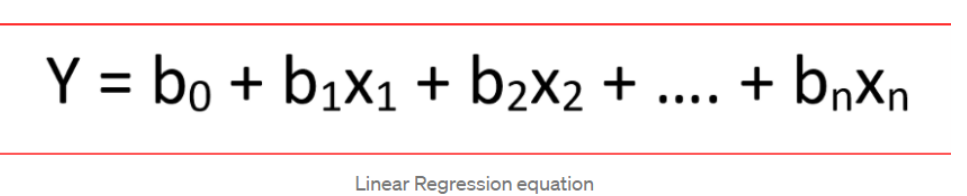

In [916]:
#TO PRINT THE FORMULA WHICH  has format : y= intercept + coefficient*Features
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",model.coef_.transpose())
coef_table.columns = ['x', 'b']
coef_table.set_index("x", inplace=True)

In [917]:
print('Linear Equation(BEST FIT LINE): {} + '.format(model.intercept_,))
for label, row in coef_table.iterrows():
    print(' {} * {} +'.format(row[0],label),sep = ", ")
    

Linear Equation(BEST FIT LINE): [1157705.7483095] + 
 26.964642348233763 * Hour +
 27.385832178259935 * Temperature(°C) +
 -8.61532176902267 * Humidity(%) +
 19.09603541353337 * Wind speed (m/s) +
 -99.45919577541305 * Solar Radiation (MJ/m2) +
 -55.861323131613595 * Rainfall(mm) +
 42.620514962818895 * Snowfall (cm) +
 -573.5810563950366 * year +
 -46.687191941030356 * month +
 -1.3482218818110085 * day +
 -406.49088644136333 * Seasons_Spring +
 -306.78495254032873 * Seasons_Summer +
 -794.9870689475854 * Seasons_Winter +
 117.30709299706112 * Holiday_No Holiday +
 928.552648147848 * Functioning Day_Yes +


# IMPORTANT METRIC FORMULAS
### R² gives us a measure of how well the actual outcomes are replicated by the model or the regression line
 
R² is always between 0 and 1 or between 0% to 100%. #A value of 1 means that the model explains all the variation in predicted variable around its mean. #A value close to 1 for r² means a good fit.

SSE = Actual value -Predicted value
Sum square of errors(SSE) or Residuals, how far did we predict a value when compared to the actual value

SST = Actual value -Mean value
Sum square of total (SST), how far is the actual value when compared to the mean value

SSR = Predicted value -mean value
Sum square of Regression(SSR), how far is the actual value when compared to the mean values

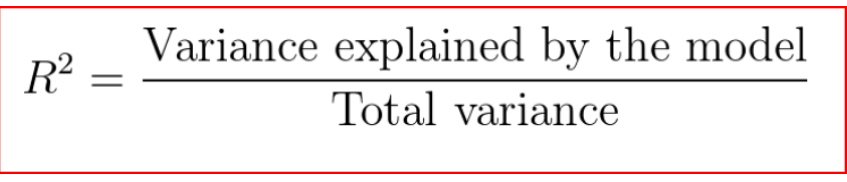

In [918]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import math

print('R SQUARE :',r2_score(y_test,y_pred)) #R^2 #R2 score for the y Variable i,e is  Rented Bike Count
print('MSE :',mean_squared_error(y_test,y_pred)) #MSE #RESIDUAL ERROR
print( 'RMSE :',math.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print('SSE :',mean_squared_error(y_test,y_pred)*len(y_test)) #SSE

R SQUARE : 0.5539058494179353
MSE : 186917.9245651343
RMSE : 432.3400566280371
SSE : 491220305.75717294


##### MSE(Estimate of Common Variance) represents a better quality of the estimator / predictor (for regression model). Here the value is high

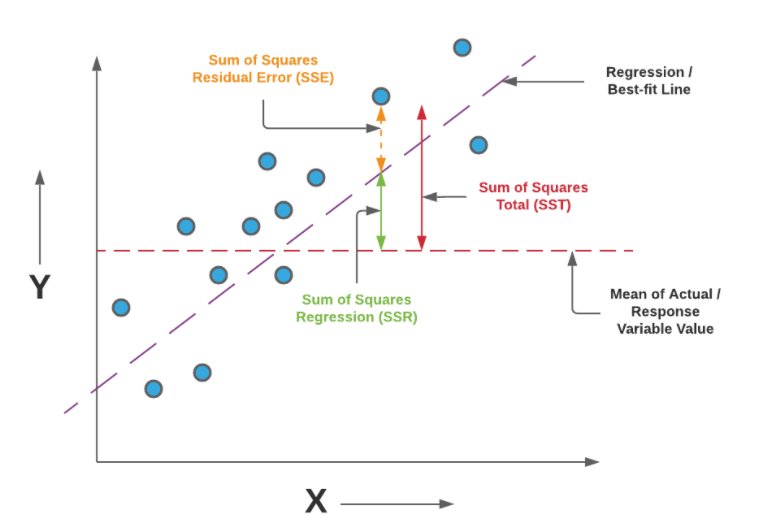

##### HERE I HAVE TRIED TO GET THE SSE ,SST AND SSR by FORMULAS

In [961]:
import numpy as np
SSE = np.sum((y_test - y_pred)**2)
print("SSE : ",float(SSE)) #Sum of ERROS(RESIDUAL)
SST = np.sum((y_test - np.mean(y_pred))**2)
print("SST : ",float(SST)) #Total sum of SQUARES


#SST= SSR + SSE
SSR = SST - SSE 
print('SSR :',float(SSR))
#RECHECK OF R2
r2 = 1 - (SSE/SST)
print('Coffeicient of Determination ',float(r2))

SSE :  491220305.75717294
SST :  1101404492.351891
SSR : 610184186.5947181
Coffeicient of Determination  0.5540055364144716


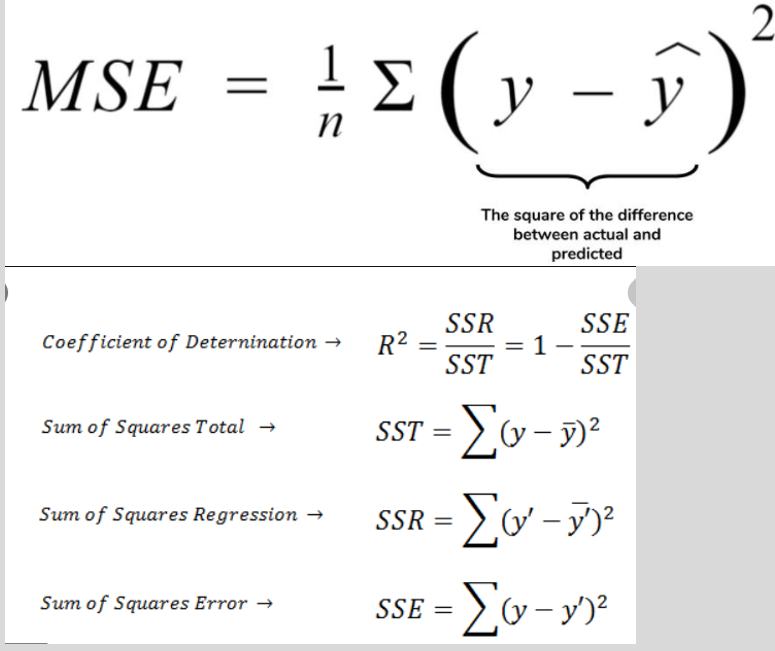

In [920]:
#predict y values
y_pred = model.predict(X_test)
y_pred

array([[  51.40261341],
       [ 995.478073  ],
       [ 573.05060028],
       ...,
       [ 599.01530566],
       [1405.97239265],
       [1303.75660839]])

# ADJUSTED R2 VALUE COUNTED

In [921]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring



n = len(X_test)#TOTAL size of the TEST SET is 2628
k = len(X_test.iloc[0]) #All the Variables in X TEST SET here it is 15 (MultiVarient) 
R2 = r2_score(y_test,y_pred)
Adj_R2 = 1 - ((n-1)*(1- R2)/(n-k-1))
print(Adj_R2)

0.5513440529942251


In [922]:
model.score(X_test,y_test) 

0.5539058494179353

# INFERENCE
1 . People RENT BIKES when Weather is Clearer(this would be based on several other FACTORS)
2 . Also More BIKES are RENTED during the EVENING,may be we can say after office hours;Provide more bikes to Cater the Demand
3 . Linear Model is not the best model here since the R^2 and Adjusted R^2 are 55 %, ,as the dataset are having mostly Controlled DATA(like Temprature,WindSpeed ,SOLAR RADAITION ) and also as we can the see that the Rental Bike count seems to vary hourly ,demand is more likely between(7AM to 9 AM) and evening(4PM to 8PM) ,so the demand for bikes varies during  morning to late night or viceversa ,there is no much linearity ,so may be different Model techniques would result in better Prediction

1.DROPPING YEAR;DAY didnt EFFECT THE R2 VALUE .
2.ADDING WEEKEND COLUMN AS TRUE AND FALSE DIDNT NOT ADD ANY VALUE TO HELP IN PREDICTION

# Logistic Regression -- RED Wine Quality Data Set
https://archive.ics.uci.edu/ml/datasets/wine+quality

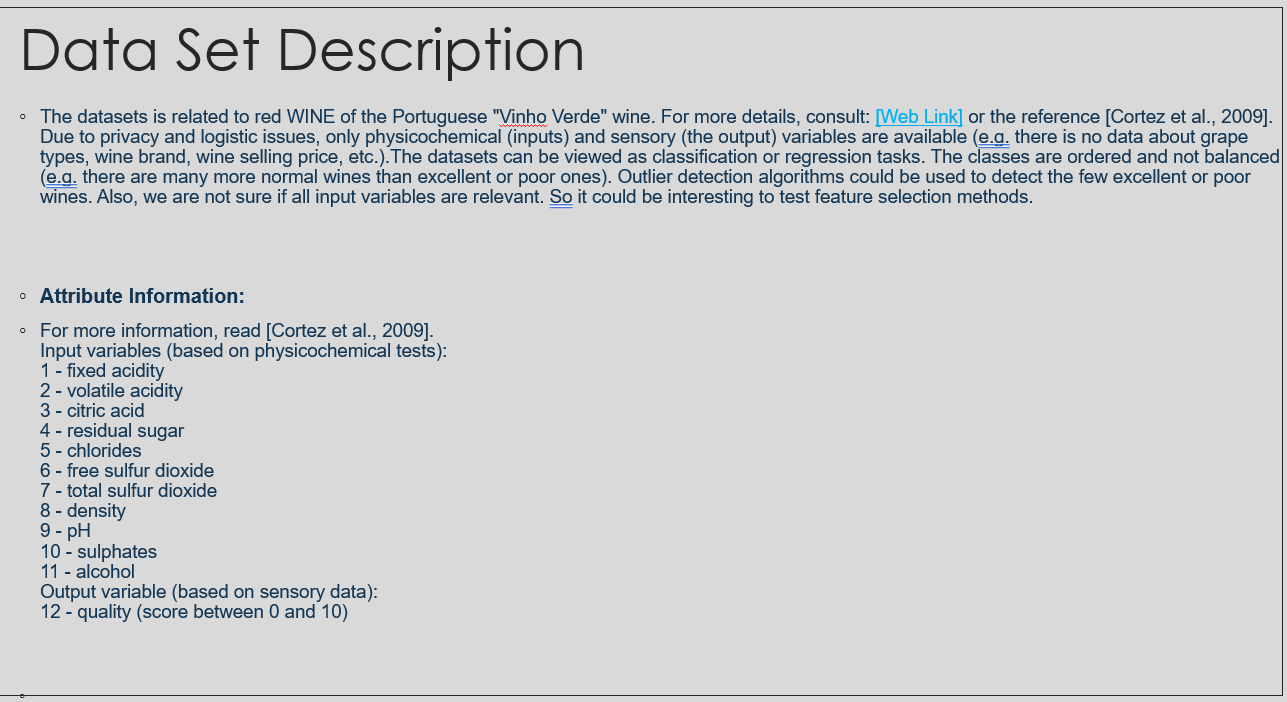

# DATA PREPROCESSING

In [962]:
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams


winequality_red = pd.read_csv('data/winequality-red.csv',na_values='NA')

# VIEWING THE DATASET

In [963]:
winequality_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# INFORMATION OF THE DATASET

In [806]:
winequality_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [807]:
#Finding Missing Values
winequality_red.isna().sum() #NO MISSING VALUES

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [808]:
#Finding Duplicate Values
sum(winequality_red.duplicated()) #240 DUPLICATE VALUES

240

In [809]:
winequality_red.drop_duplicates(inplace=True) #I Dropped DUPLICATES

In [810]:
winequality_red.shape #1359 OBS after DROP

(1359, 12)

# Outliers Detection

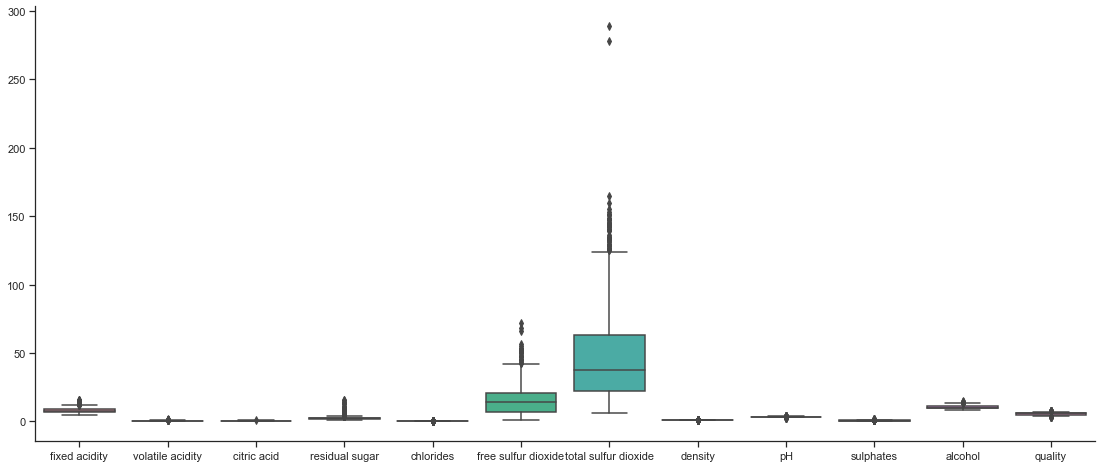

In [811]:
#TO FIND OUTLIERS PLOTTING BOXPLOT
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(19,8))
sns.boxplot(data=winequality_red) #Some Outliers here
sns.despine() 

In [812]:
winequality_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


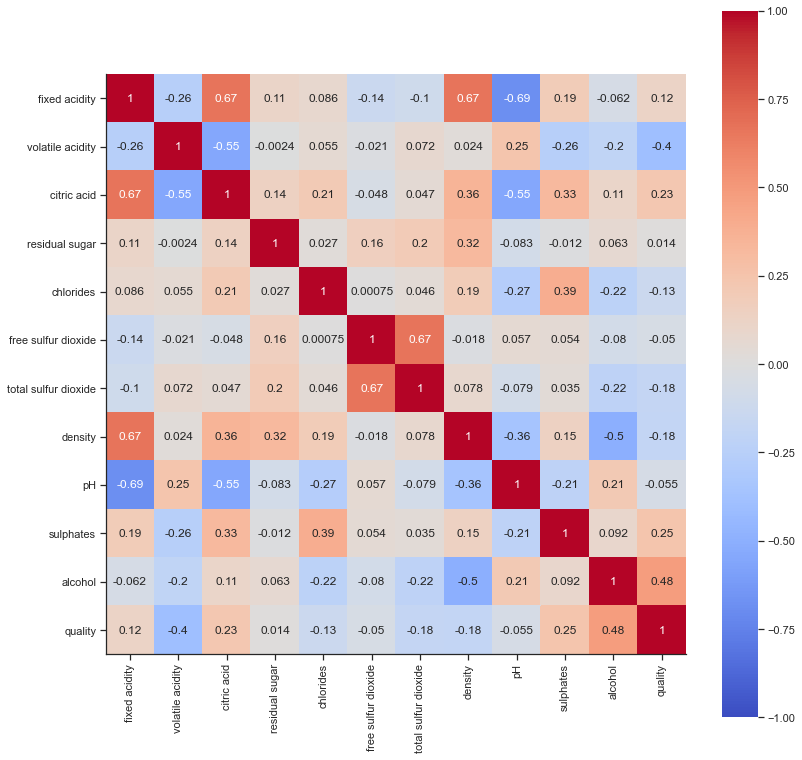

In [813]:
#Finding relation between Variables
plt.figure(figsize=(13,13))
sns.heatmap(winequality_red.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)
sns.despine()

#WE CAN SEE THAT citric acid and fixed acidity realted,density and fixed acidity realted,free sulfur dioxide and total sulfur dioxide are related

# SOME EDA

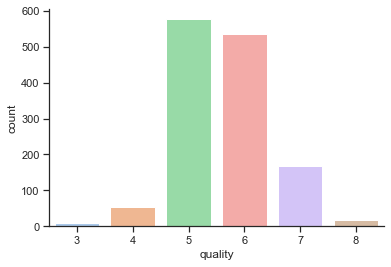

In [814]:
#TARGET VARIABLE (PREDICATE VARIABLE VISULAIZATION)
sns.countplot(x=winequality_red['quality'])
sns.despine() 

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

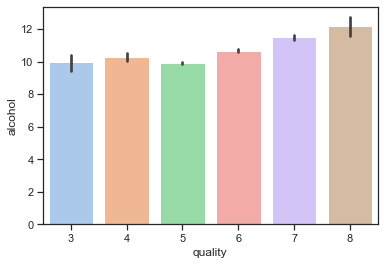

In [815]:
#ALCOHOL HAS MORE RELATION WITH QUALITY
sns.barplot(x = 'quality', y = 'alcohol',data= winequality_red)
#BAR CHART the FREQ MEASURE FOR EACH CATEGORY,here the qualities with 7 and 8 have values with higher alcohol value points

## CREATING CATEGORICAL COLUMNS FOR MULTICLASS CLASSIFICATION

In [816]:
#CLASSIFIED TO as QUALITY_EXPERIENCE with 3 CLASSIFICATION AS SHOWN BELOW
winequality_red['quality_Experience'] = winequality_red['quality'].map(
                                                       { 3 : 'BAD',  4 : 'BAD', 
                                                         5 : 'GOOD',  6 : 'GOOD',
                                                         7 : 'EXCELLENT',  8 : 'EXCELLENT'})


In [817]:
#ENCODED THE QUALITY_EXPERIENCE to NUMBERS as BELOW
winequality_red['quality_Num'] = winequality_red['quality_Experience'].map(
                                              {
                                                    'BAD': 0,
                                                    'GOOD': 1,
                                                    'EXCELLENT' :2
                                              } 
                                              )
winequality_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_Experience,quality_Num
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,GOOD,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,GOOD,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,GOOD,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,GOOD,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,GOOD,1


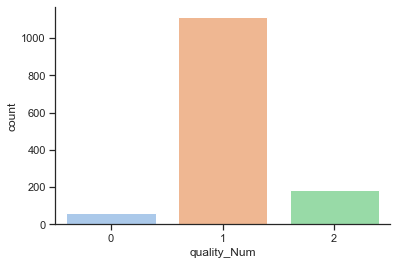

In [818]:
#TARGET VARIABLE (PREDICATE VARIABLE VISULAIZATION)
sns.countplot(x=winequality_red['quality_Num'])
sns.despine() 

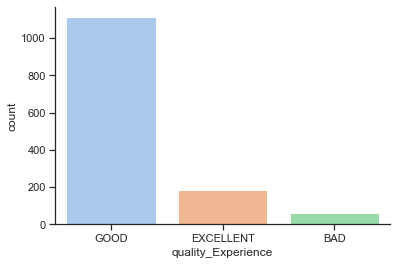

In [819]:
#TARGET VARIABLE (PREDICATE VARIABLE VISULAIZATION)
sns.countplot(x=winequality_red['quality_Experience']) #GOOD =1,BAD = 0,EXCELLENT = 2
sns.despine() 

# Outliers  Handling

In [ ]:
REMOVED THE OUTLIERS FROM free sulfur dioxide AND total sulfur dioxide by changing the data z scores and later changing back to original values

In [820]:
#TO Remove Outliers from free sulfur dioxide and total sulfur dioxide I am Scaling the DATA WITH ZSCORES
#Need to drop the CATEGROICAL COLUMN CREATED
winequality_red=winequality_red.drop(['quality_Experience'],axis=1)
#STANDARDISING ALL THE COLUMNS
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
winequality_red_scaled = sc.fit_transform(winequality_red)

In [821]:
#Converted to DATAFRAME since it is easier to handle conditions on columns
winequality_red_scaled=pd.DataFrame(winequality_red_scaled)

In [822]:
winequality_red_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03
mean,-8.298488e-16,2.740021e-16,-2.385468e-17,-1.286682e-16,1.627347e-16,-1.836075e-16,1.388800e-17,5.241674e-14,-1.386839e-15,-5.865580e-16,2.998174e-17,1.390679e-15,5.888103e-16
std,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00
min,-2.137008e+00,-2.238023e+00,-1.393258e+00,-1.200903e+00,-1.542254e+00,-1.426094e+00,-1.222457e+00,-3.553604e+00,-3.676535e+00,-1.926712e+00,-1.878873e+00,-3.186363e+00,-2.612086e+00
25%,-6.972071e-01,-7.623226e-01,-9.328165e-01,-4.611571e-01,-3.671819e-01,-8.515696e-01,-7.433672e-01,-5.935822e-01,-6.438707e-01,-6.371766e-01,-8.619244e-01,-7.570404e-01,-2.135557e-01
50%,-2.364707e-01,-5.180013e-02,-6.309377e-02,-2.392334e-01,-1.848432e-01,-1.812915e-01,-2.642772e-01,-4.789431e-03,1.376908e-03,-2.268699e-01,-2.147753e-01,4.576206e-01,-2.135557e-01
75%,5.122260e-01,6.040667e-01,8.066290e-01,5.666484e-02,5.827504e-02,4.889867e-01,4.843008e-01,5.947087e-01,5.820998e-01,4.178978e-01,6.172735e-01,4.576206e-01,-2.135557e-01
max,4.370894e+00,5.741690e+00,3.722758e+00,9.599383e+00,1.059340e+01,5.372442e+00,7.251446e+00,3.736721e+00,4.518110e+00,7.862034e+00,4.130369e+00,2.886943e+00,2.184975e+00


In [823]:
winequality_red_scaled[(winequality_red_scaled[5] > 3) | (winequality_red_scaled[6] > 3)  ]

,0,1,2,3,4,5,6,7,8,9,10,11,12
12,0.339450,0.494756,-0.472375,0.944360,1.780363,3.457361,2.939637,1.012216,-0.966495,1.297126,-1.139274,-0.757040,-0.213556
13,0.339450,0.494756,-0.421215,1.018334,1.658804,3.361607,3.029466,1.012216,-0.901970,1.590203,-1.139274,-0.757040,-0.213556
53,-0.466839,0.549411,-0.779336,1.906029,0.463472,3.265853,1.891628,0.851636,-0.321247,0.652359,-0.954374,-0.757040,-0.213556
99,-0.121287,1.396573,1.267070,-0.387183,0.686331,2.021051,3.179182,0.102264,-0.643871,0.183437,-1.046824,-0.757040,-0.213556
309,-1.273128,-1.746123,0.653148,-0.831030,-0.448221,2.356190,3.538499,-2.948753,-0.385772,-0.402716,1.356873,0.457621,-0.213556
346,-0.985167,1.123295,-1.290938,3.977316,0.686331,4.989426,2.310831,1.440429,1.033773,-0.754407,-0.492125,-0.757040,-0.213556
448,0.109082,0.686050,1.113590,2.645774,0.686331,1.733789,3.119295,2.296855,0.001377,2.821123,-1.046824,-0.757040,-0.213556
506,2.009619,-1.090256,1.113590,0.648461,0.098795,3.648869,0.993334,1.868642,-0.063148,0.593744,0.247474,1.672282,2.184975
513,-0.985167,-0.762323,1.113590,-0.609106,-0.367182,0.680495,3.059409,-2.413487,-1.224594,-0.930253,0.987073,0.457621,-0.213556
562,-0.927575,-0.598356,-0.011934,4.495138,-0.407702,0.776249,3.029466,-1.021795,-0.966495,-0.519946,0.802173,0.457621,-0.213556


In [824]:
#REMOVING OUTLIERS FROM free sulfur dioxide(COLUMN 5) AND total sulfur dioxide(COLUMN 6)
indexNames = winequality_red_scaled[(winequality_red_scaled[5] > 3) | (winequality_red_scaled[6] > 3)  ].index
indexNames

Int64Index([  12,   13,   53,   99,  309,  346,  448,  506,  513,  562,  564,
             582,  592,  791,  792,  838,  918,  920,  963,  985, 1003, 1049,
            1060, 1103, 1151, 1216, 1250, 1325],
           dtype='int64')

In [825]:
#DROP THE VALUES greater than 3 Z SCORE 
winequality_red_scaled.drop(indexNames , inplace=True)
#TRASNFROMING BACK TO ORIGINAL VALUES(NOT  IN STANDARAD SCALE)
winequality_red_scaled=sc.inverse_transform(winequality_red_scaled)
#TAGGING THE COLUMN NAMES
winequality_red_df=pd.DataFrame(winequality_red_scaled,columns = winequality_red.columns)

In [826]:
winequality_red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_Num
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,1.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,1.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,1.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,1.0
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0,1.0
1327,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0,1.0
1328,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0,1.0
1329,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0,1.0


# CHECKING THE FREQUENCY OF THE TARGET COLUMN

In [827]:
winequality_red_df['quality_Num'].value_counts()

1.0    1088
2.0     180
0.0      63
Name: quality_Num, dtype: int64

# SPLITING THE DATA WITH X(HAVING PREDICTOR VARIBALE) AND Y(RESPONSE VARIABLE)

In [870]:
#extract dependent and independent variables ,
#free sulfur dioxide is highly correlated to total sulfur dioxide and fixed density and density too are having linear relation
#,since it is a logistic Regression ,i havent removed them here
X = winequality_red_df.drop(['quality','quality_Num'],axis=1)
y = winequality_red_df.quality_Num

SPLITING THE DATA TO X AND INTO TRAIN AND TEST 

In [ ]:
#Split into training 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.20)
X_test.head()

SCALING THE DATA BEFORE APPLYING THE LOGISITIC MODEL

In [872]:
#STANDARDISNG THE VARIABLES
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train) #use only training set 
                                           #to make any adjustments to the model
                                           #during training

CHECKING THE CROSS VALIDATION SCORE for LogisticRegression

In [887]:
#Do k-fold cross validation using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(),X_train_scaled,y_train,cv=5).mean() #82 PERCENT WITH IMBALANCE DATA

0.8270883160598814

MOST IMPORTANT METRICS
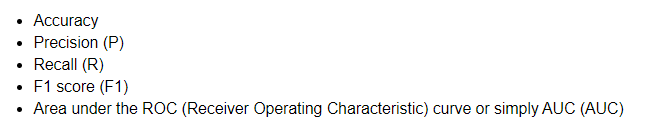

#### Import the library LogisticRegression from sklearn.linear_model. 
##Create a LogisticRegression object and then try and fit the training data

In [874]:
#import Logistic Regression 

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500, tol=0.001,multi_class='ovr',class_weight={0:13, 1:1 ,2:3}) #1.0    1088
                                                                                                    #2.0     180
                                                                                                    #0.0      63
model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight={0: 13, 1: 1, 2: 3}, max_iter=500,
                   multi_class='ovr', tol=0.001)

##### ADDED CLASS WEIGHT SINCE MY Y was HIGHLY IMBALANCED ;BY TRAILS THE ABOVE CLASS WEIGHT GAVE BEST ACCURACY AND ALSO BETTER RECALL VALUES

##### SCALE THE TEST RESPONSE VARIABLES BEFORE APPLYING THE PREDICT AS THE TRAIN RESPONSE VARIABLES SET ARE IN STANDARD SCALAR

In [846]:
#WE GET 3 INTERCEPTS HERE ,because we have 3 CATEGORIES AND THEREFORE 3 DECESION BOUNDRIES to be calculated(0->1,2,1->0,2,2->1,0) 
print('The equation of this Logistic Regression has format : y= intercept + coefficient*Features ')
print('Logistic model intercept: {} and the coefficients are: {}' .format(model.intercept_,model.coef_))

The equation of this Logistic Regression has format : y= intercept + coefficient*Features 
Logistic model intercept: [-1.44413223  0.02707345 -2.24198805] and the coefficients are: [[ 0.96114423  1.06171306  0.2151101   0.47826571  0.26288085  0.17992286
  -0.78400787 -0.98741241  0.86664349  0.06334736 -1.37059888]
 [-0.94348127 -0.64830577 -0.27383303 -0.32601421  0.11041281 -0.12726006
   0.66679369  0.96459312 -0.50345665 -0.43283717  0.11736223]
 [ 0.24413956 -0.64846499 -0.07781366 -0.07109485 -0.64167079  0.20840552
  -0.57374184  0.04419381 -0.25076665  0.74357546  1.39685367]]


In [875]:
#To be able to test we need to scale the test data too (X part only) 
#using the same scaler that was used to scale the training data
X_test_scaled = sc.transform(X_test)

#Predict_proba gives the probabilities P(y=Ci|x)
model.predict_proba(X_test_scaled)

array([[0.77190163, 0.21724652, 0.01085186],
       [0.01476767, 0.77657938, 0.20865295],
       [0.14861479, 0.78248213, 0.06890308],
       [0.11649973, 0.6393145 , 0.24418577],
       [0.05269405, 0.65570539, 0.29160056],
       [0.40003621, 0.5381228 , 0.061841  ],
       [0.14516995, 0.65533365, 0.19949641],
       [0.03349532, 0.93248825, 0.03401643],
       [0.51125159, 0.45266314, 0.03608527],
       [0.05785349, 0.25357579, 0.68857072],
       [0.31840176, 0.65261648, 0.02898176],
       [0.1744113 , 0.76369577, 0.06189293],
       [0.08095164, 0.91630272, 0.00274564],
       [0.68332291, 0.31353797, 0.00313912],
       [0.11654976, 0.69409201, 0.18935823],
       [0.38175895, 0.60055507, 0.01768598],
       [0.21564756, 0.75004749, 0.03430494],
       [0.17114945, 0.82167606, 0.00717449],
       [0.38995706, 0.57652104, 0.0335219 ],
       [0.29201095, 0.68746673, 0.02052233],
       [0.22770806, 0.65709772, 0.11519423],
       [0.5041156 , 0.44058941, 0.05529499],
       [0.

In [876]:
probabilities_class0 = model.predict_proba(X_test_scaled)[:,0]
probabilities_class1 = model.predict_proba(X_test_scaled)[:,1]
probabilities_class2 = model.predict_proba(X_test_scaled)[:,2]

In [877]:
print('Few predictions for CLASS 0 BAD WINE :',probabilities_class0[10:15])
print('Few predictions for CLASS 1 GOOD WINE :',probabilities_class1[:5])
print('Few predictions for CLASS 2 EXCELLENT WINE :',probabilities_class2[:5])

Few predictions for CLASS 0 BAD WINE : [0.31840176 0.1744113  0.08095164 0.68332291 0.11654976]
Few predictions for CLASS 1 GOOD WINE : [0.21724652 0.77657938 0.78248213 0.6393145  0.65570539]
Few predictions for CLASS 2 EXCELLENT WINE : [0.01085186 0.20865295 0.06890308 0.24418577 0.29160056]


#### MODEL PREDICT THE Y VARIABLE IN ITS ORIGINAL VALUES OF Y TEST

In [878]:
#Whereas predict method gives the class prediction as either 0 , 1 ,2
# predict probabilities

y_predict = model.predict(X_test_scaled)
y_predict[1:10]

array([1., 1., 1., 1., 1., 1., 1., 0., 2.])

ACCURACY

In [879]:
#Performance measures for classification
#Accuracy = total no. of correct prediction/total no. of datapoints

model.score(X_test_scaled,y_test)

0.6329588014981273

## ACCURACY SCORE AND CONFUSION METRIX

In [880]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predict)

0.6329588014981273

## DETAILS OF CONFUSION MATRIX

In [881]:
#Confusion matrix corresponding prob
'''
        Predicted
        0   1  2
True  0 TP  FN FN
      1 FN  TP FN
      2 FN  FN TP
0-BAD ;1-GOOD ;2- EXCELLENT
'''
cm2 = confusion_matrix(y_test,y_predict)
cm2

array([[  7,   6,   0],
       [ 48, 140,  37],
       [  3,   4,  22]], dtype=int64)

The main diagonal (7, 140, 22) gives the correct predictions.
FOR EXAMPLE of CLASS 1 (i.e is GOOD WINE)
The model predicted of these correctly i.e is 140 are GOOD WINES and incorrectly predicted 48 of the GOOD WINES to be BAD WINE and 37 of the GOOD WINES to be EXCELLENT WINE.

## DETAILS OF CLASSIFICATION REPORT

In [882]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.12      0.54      0.20        13
         1.0       0.93      0.62      0.75       225
         2.0       0.37      0.76      0.50        29

    accuracy                           0.63       267
   macro avg       0.48      0.64      0.48       267
weighted avg       0.83      0.63      0.69       267



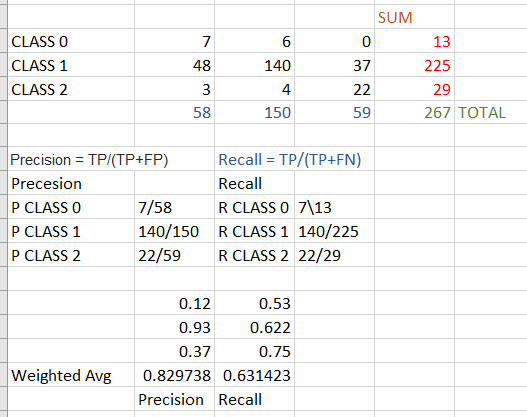

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

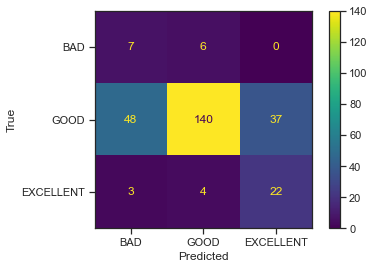

In [883]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
import numpy as np
cm = confusion_matrix(y_test, y_predict)
cmd = ConfusionMatrixDisplay(cm, display_labels=['BAD','GOOD','EXCELLENT'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

In [884]:
# fit model
#OneVsRestClassifier is needed AUC-ROC for Multi-Class Classification

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train_scaled, y_train)
pred = clf.predict(X_test_scaled)
pred_prob = clf.predict_proba(X_test_scaled)


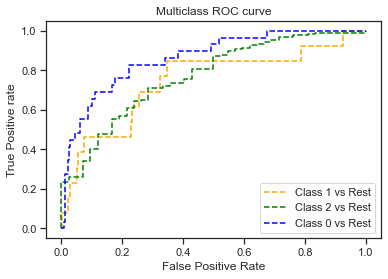

In [768]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
  
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest') #FOR GOOD WINE
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest') #FOR EXCELLENT WINE
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 0 vs Rest') #FOR BAD WINE
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

# INFERENCE
1. Percentage of ALCOHOL increases the WINE QUALITY
2. LOGISTIC CLASSIFICATION is a good MEASURE OF PREDICTION if the IMBALANCE OF PREDICTOR is not that important ,as mentioned in the DATASET DESCRIPTION Quality based on SENSORY DATA 
3 FOR Learning Purpose,I have applied different CLASS WEIGHT to BALANCE THE PREDICTOR VARIABLE and which resulted with ACCURACY OF 63 percent.